# Predicting Real Estate House Prices

## This task is provided to test your understanding of building a Linear Regression model for a provided dataset

### Dataset: Real_estate.csv

### Import the necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import sklearn as skl
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

### Read the csv data into a pandas dataframe and display the first 5 samples

In [ ]:
housing_data = pd.read_csv("Real estate.csv")
housing_data.head(5)

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


### Show more information about the dataset

In [ ]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


### Find how many samples are there and how many columns are there in the dataset

In [ ]:
housing_data.shape

(414, 8)

### What are the features available in the dataset?

In [ ]:
housing_data.keys()

Index(['No', 'X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

### Check if any features have missing data

In [ ]:
housing_data.isna().sum()

No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

### Group all the features as dependent features in X

In [ ]:
X = housing_data.get(['No', 'X1 transaction date', 'X2 house age', 'X3 distance to the nearest MRT station', 'X4 number of convenience stores', 'X5 latitude','X6 longitude'])
X

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245
...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067


### Group feature(s) as independent features in y

In [ ]:
y = housing_data.loc[:,"Y house price of unit area"]
y

0      37.9
1      42.2
2      47.3
3      54.8
4      43.1
       ... 
409    15.4
410    50.0
411    40.6
412    52.5
413    63.9
Name: Y house price of unit area, Length: 414, dtype: float64

### Split the dataset into train and test data

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=23)

In [ ]:
X_train

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
305,306,2013.083,16.2,289.3248,5,24.98203,121.54348
145,146,2012.917,2.1,451.2438,5,24.97563,121.54694
238,239,2013.083,12.8,732.8528,0,24.97668,121.52518
158,159,2013.000,11.6,390.5684,5,24.97937,121.54245
16,17,2013.250,0.0,292.9978,6,24.97744,121.54458
...,...,...,...,...,...,...,...
237,238,2013.167,13.0,732.8528,0,24.97668,121.52518
31,32,2012.750,29.6,769.4034,7,24.98281,121.53408
40,41,2013.000,13.6,4082.0150,0,24.94155,121.50381
230,231,2013.500,4.0,2147.3760,3,24.96299,121.51284


In [ ]:
X_test

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
182,183,2013.500,13.5,2147.3760,3,24.96299,121.51284
221,222,2013.333,9.0,1402.0160,0,24.98569,121.52760
73,74,2013.167,13.8,4082.0150,0,24.94155,121.50381
292,293,2013.083,17.5,395.6747,5,24.95674,121.53400
380,381,2013.333,14.1,289.3248,5,24.98203,121.54348
...,...,...,...,...,...,...,...
151,152,2013.500,4.9,387.7721,9,24.98118,121.53788
376,377,2013.417,14.7,1717.1930,2,24.96447,121.51649
284,285,2012.917,15.0,383.2805,7,24.96735,121.54464
411,412,2013.250,18.8,390.9696,7,24.97923,121.53986


In [ ]:
y_train

305    55.0
145    45.5
238    40.6
158    39.4
16     70.1
       ... 
237    39.0
31     25.0
40     15.9
230    33.4
83     17.7
Name: Y house price of unit area, Length: 289, dtype: float64

In [ ]:
y_test

182    23.6
221    38.5
73     20.0
292    24.5
380    53.3
       ... 
151    44.7
376    30.5
284    34.4
411    40.6
139    42.5
Name: Y house price of unit area, Length: 125, dtype: float64

### Choose the model (Linear Regression)

In [ ]:
from sklearn.linear_model import LinearRegression

### Create an Estimator object

In [ ]:
model = LinearRegression(fit_intercept=True)

### Arranging the data

In [ ]:
X_train.to_numpy()
X_train.shape




(289, 7)

### Train the model

In [ ]:
model.fit(X_train,y_train)


LinearRegression()

In [ ]:
print(model.intercept_)
print(model.coef_)

-15717.602362853286
[ 3.48345102e-04  5.71755067e+00 -2.64822249e-01 -4.72820437e-03
  1.10506351e+00  2.48661618e+02 -1.61113682e+01]


### Apply the model

In [ ]:
y_pred = model.predict(X_test)

### Display the coefficients

In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")

Mean Squared Error: 54.06081943610726
R-squared Score: 0.6022765351050576


### Find how well the trained model did with testing data

In [ ]:
r_sq = model.score(X_test, y_test)
print('R score:', r_sq)

R score: 0.6022765351050576


### Plot House Age Vs Price
#### Hint: Use regplot in sns

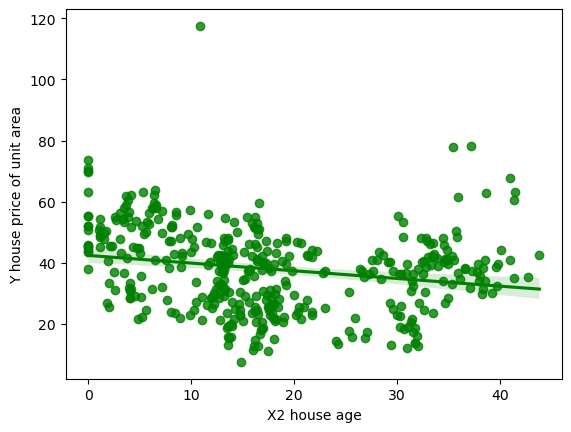

In [ ]:
sns.regplot(x="X2 house age", y="Y house price of unit area",color="g", data=housing_data)
plt.show()

### Plot Distance to MRT station Vs Price

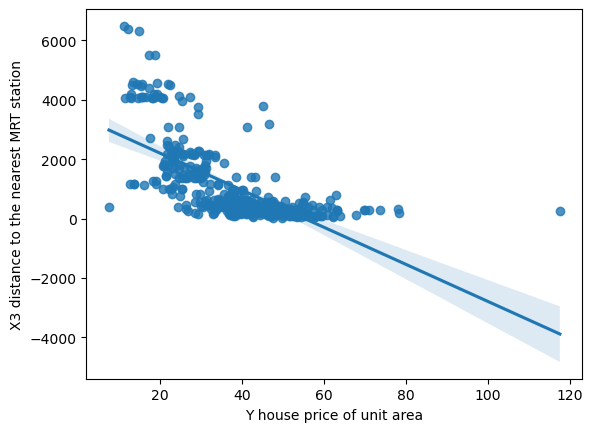

In [ ]:
sns.regplot(x="Y house price of unit area", y="X3 distance to the nearest MRT station", data=housing_data)
plt.show()

### Plot Number of Convienience Stores Vs Price

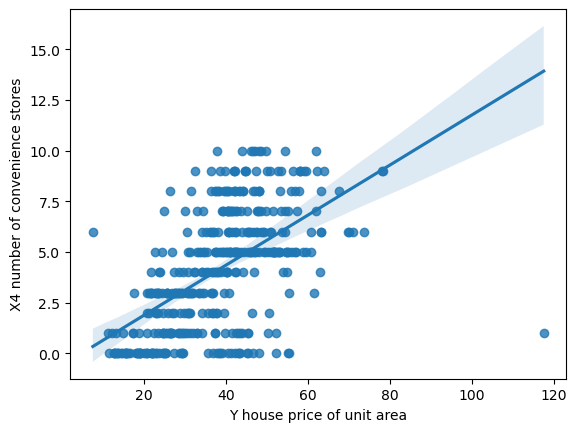

In [ ]:
sns.regplot(x="Y house price of unit area", y="X4 number of convenience stores", data=housing_data)
plt.show()